In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
data = pd.read_csv('train.csv')

In [4]:

data = np.array(data)
m, n = data.shape
np.random.shuffle(data)


data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
Y_train

array([7, 0, 1, ..., 9, 7, 5])

In [6]:
def init_params():
    W1 = np.random.randn(128, 784) * 0.01
    b1 = np.zeros((128, 1))
    W2 = np.random.randn(10, 128) * 0.01
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

In [7]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [8]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [9]:
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [10]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [11]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [12]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 550)

Iteration:  0
[8 6 1 ... 0 6 1] [7 0 1 ... 9 7 5]
0.09058536585365853
Iteration:  10
[7 0 1 ... 0 7 8] [7 0 1 ... 9 7 5]
0.4153414634146341
Iteration:  20
[7 0 1 ... 0 7 8] [7 0 1 ... 9 7 5]
0.47978048780487803
Iteration:  30
[7 0 1 ... 0 7 0] [7 0 1 ... 9 7 5]
0.48785365853658536
Iteration:  40
[7 0 1 ... 7 7 0] [7 0 1 ... 9 7 5]
0.521829268292683
Iteration:  50
[7 0 1 ... 7 7 3] [7 0 1 ... 9 7 5]
0.5942195121951219
Iteration:  60
[7 0 1 ... 7 7 3] [7 0 1 ... 9 7 5]
0.6545121951219512
Iteration:  70
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.6947073170731707
Iteration:  80
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.7305365853658536
Iteration:  90
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.7631219512195122
Iteration:  100
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.7848780487804878
Iteration:  110
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.8024634146341464
Iteration:  120
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.8162682926829268
Iteration:  130
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
0.8279268292682926
Iteration:  140

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [14]:

def sgd_optimizer(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            predictions = get_predictions(A2)
            print(f"SGD Iteration {i}, Accuracy: {get_accuracy(predictions, Y)}")
    return W1, b1, W2, b2

In [15]:
print("Training with SGD...")
W1_sgd, b1_sgd, W2_sgd, b2_sgd = sgd_optimizer(X_train, Y_train, 0.1, 550)

Training with SGD...
[0 0 2 ... 3 3 3] [7 0 1 ... 9 7 5]
SGD Iteration 0, Accuracy: 0.11070731707317073
[7 0 1 ... 3 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 10, Accuracy: 0.40653658536585363
[7 0 1 ... 3 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 20, Accuracy: 0.5209756097560976
[7 0 1 ... 3 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 30, Accuracy: 0.5609268292682927
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 40, Accuracy: 0.5845365853658536
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 50, Accuracy: 0.6255121951219512
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 60, Accuracy: 0.6702439024390244
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 70, Accuracy: 0.6974146341463414
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 80, Accuracy: 0.7276585365853658
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 90, Accuracy: 0.7622439024390244
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 100, Accuracy: 0.7869024390243903
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
SGD Iteration 110, Accuracy:

In [16]:
def adam_optimizer(X, Y, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, iterations=550):
    W1, b1, W2, b2 = init_params()

    mW1 = np.zeros_like(W1)
    mb1 = np.zeros_like(b1)
    mW2 = np.zeros_like(W2)
    mb2 = np.zeros_like(b2)

    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)

    t = 0

    for i in range(iterations):
        t += 1
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)

        mW1 = beta1 * mW1 + (1 - beta1) * dW1
        mb1 = beta1 * mb1 + (1 - beta1) * db1
        mW2 = beta1 * mW2 + (1 - beta1) * dW2
        mb2 = beta1 * mb2 + (1 - beta1) * db2

        vW1 = beta2 * vW1 + (1 - beta2) * (dW1 ** 2)
        vb1 = beta2 * vb1 + (1 - beta2) * (db1 ** 2)
        vW2 = beta2 * vW2 + (1 - beta2) * (dW2 ** 2)
        vb2 = beta2 * vb2 + (1 - beta2) * (db2 ** 2)


        mW1_hat = mW1 / (1 - beta1 ** t)
        mb1_hat = mb1 / (1 - beta1 ** t)
        mW2_hat = mW2 / (1 - beta1 ** t)
        mb2_hat = mb2 / (1 - beta1 ** t)

        vW1_hat = vW1 / (1 - beta2 ** t)
        vb1_hat = vb1 / (1 - beta2 ** t)
        vW2_hat = vW2 / (1 - beta2 ** t)
        vb2_hat = vb2 / (1 - beta2 ** t)


        W1 = W1 - alpha * mW1_hat / (np.sqrt(vW1_hat) + epsilon)
        b1 = b1 - alpha * mb1_hat / (np.sqrt(vb1_hat) + epsilon)
        W2 = W2 - alpha * mW2_hat / (np.sqrt(vW2_hat) + epsilon)
        b2 = b2 - alpha * mb2_hat / (np.sqrt(vb2_hat) + epsilon)

        if i % 10 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Adam Iteration {i}, Accuracy: {acc:.4f}")

    return W1, b1, W2, b2

In [17]:
print("Training with Adam...")
W1_adam, b1_adam, W2_adam, b2_adam = adam_optimizer(X_train, Y_train, alpha=0.001, iterations=500)

Training with Adam...
[8 3 3 ... 3 8 8] [7 0 1 ... 9 7 5]
Adam Iteration 0, Accuracy: 0.1037
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
Adam Iteration 10, Accuracy: 0.6409
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
Adam Iteration 20, Accuracy: 0.7400
[7 0 1 ... 9 7 3] [7 0 1 ... 9 7 5]
Adam Iteration 30, Accuracy: 0.8123
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 40, Accuracy: 0.8398
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 50, Accuracy: 0.8666
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 60, Accuracy: 0.8841
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 70, Accuracy: 0.8964
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 80, Accuracy: 0.9040
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 90, Accuracy: 0.9108
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 100, Accuracy: 0.9163
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 110, Accuracy: 0.9208
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam Iteration 120, Accuracy: 0.9251
[7 0 1 ... 9 7 5] [7 0 1 ... 9 7 5]
Adam

Prediction:  [7]
Label:  7


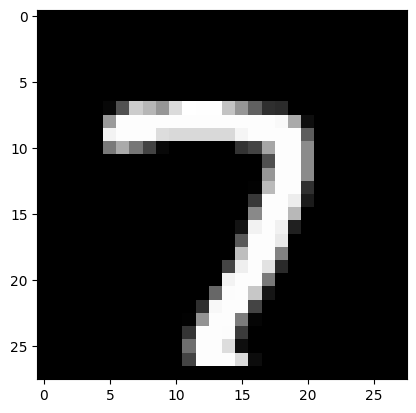

Prediction:  [0]
Label:  0


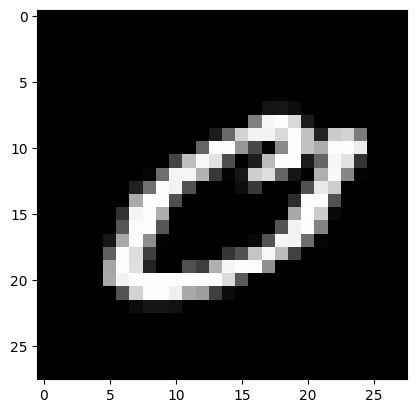

Prediction:  [1]
Label:  1


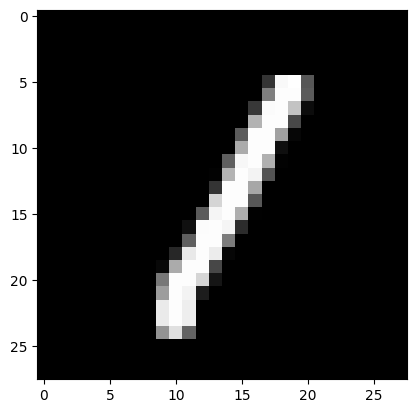

Prediction:  [5]
Label:  0


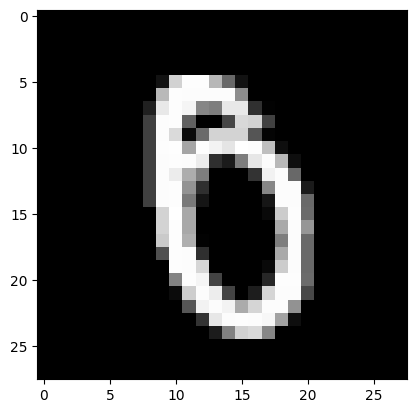

Prediction:  [1]
Label:  1


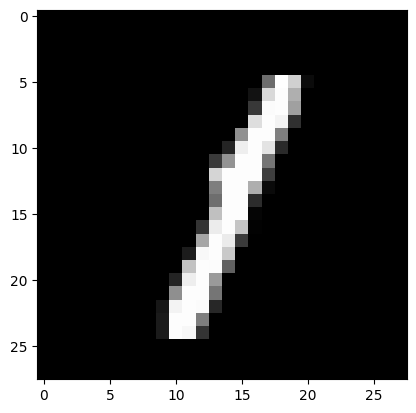

Prediction:  [6]
Label:  6


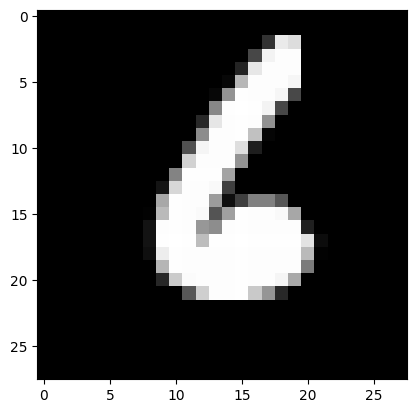

Prediction:  [9]
Label:  9


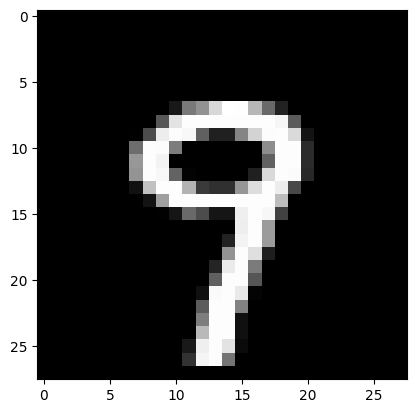

Prediction:  [5]
Label:  5


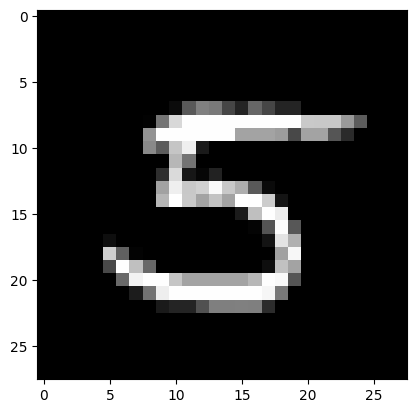

Prediction:  [8]
Label:  8


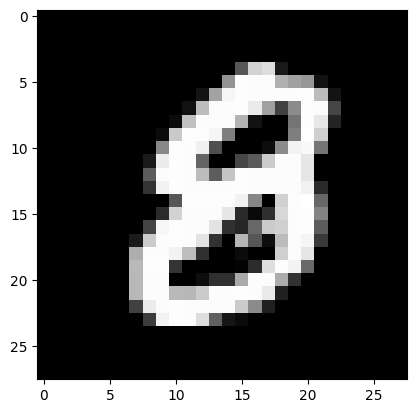

Prediction:  [3]
Label:  3


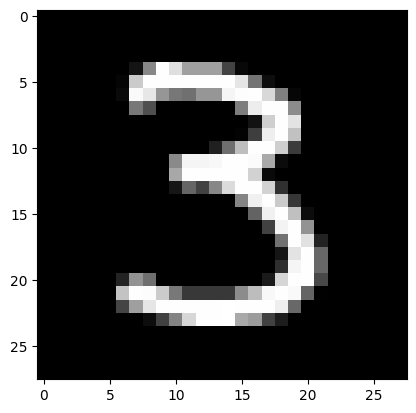

In [35]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

In [28]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 1 0 8 6 1 8 3 7 3 1 3 8 0 4 7 4 5 9 0 1 4 3 3 4 8 1 0 9 6 3 2 9 5 7 8 8
 0 5 8 7 1 8 5 9 5 6 0 0 9 4 6 2 4 1 3 4 3 2 6 2 9 5 0 9 9 0 9 4 0 0 8 1 8
 7 2 4 4 2 3 5 4 9 6 4 4 9 3 6 1 4 7 2 9 4 5 7 3 8 1 8 0 9 5 6 8 1 9 5 0 0
 6 7 3 7 9 0 9 8 2 2 5 4 9 2 0 7 1 4 4 9 2 3 4 3 3 6 9 9 3 6 3 9 5 0 7 9 3
 6 8 5 4 9 3 4 6 6 8 5 8 5 5 6 1 3 1 8 3 2 7 6 3 1 9 5 1 0 3 9 3 8 1 1 6 7
 9 0 9 2 5 1 4 8 9 2 8 8 7 7 5 4 8 4 8 7 9 1 8 0 1 6 3 8 3 1 2 7 9 5 5 0 2
 6 7 9 0 9 7 4 7 9 0 2 2 9 1 1 4 5 8 0 1 5 0 7 6 7 2 9 4 4 5 4 3 3 6 8 7 3
 5 2 4 6 3 9 7 9 1 1 2 8 7 7 0 1 0 8 6 9 3 6 6 3 1 3 6 9 6 0 4 4 3 7 9 4 7
 3 4 1 0 9 0 3 1 2 4 6 2 1 3 1 0 7 7 8 7 9 7 7 4 4 6 2 4 5 3 4 1 9 8 3 6 6
 5 0 9 3 7 1 4 0 6 4 5 9 9 7 0 9 5 4 4 8 0 2 0 5 3 9 6 1 9 7 7 2 7 9 8 5 9
 2 7 5 9 4 6 7 7 3 2 7 7 7 9 0 4 1 8 4 1 3 3 4 8 3 9 4 5 6 2 6 4 4 8 0 7 9
 6 6 8 3 9 3 1 3 9 6 6 2 3 2 6 6 0 6 1 7 7 0 8 5 1 7 4 7 1 0 6 0 0 3 4 6 7
 8 3 7 1 6 4 0 4 1 7 4 9 6 4 1 2 0 1 7 1 0 0 5 4 4 4 4 0 5 0 2 2 5 0 6 8 3
 8 5 7 8 7 8 7 0 0 0 3 5 

np.float64(0.878)